In [1]:
from torchvision import datasets, transforms
import os

# 2.1 where to store data
data_dir = os.path.abspath("./data")
os.makedirs(data_dir, exist_ok=True)

# 2.2 CIFAR-10 (train + test)
datasets.CIFAR10(root=data_dir, train=True,  download=True, transform=transforms.ToTensor())
datasets.CIFAR10(root=data_dir, train=False, download=True, transform=transforms.ToTensor())

# 2.3 MNIST (train + test)
datasets.MNIST(   root=data_dir, train=True,  download=True, transform=transforms.ToTensor())
datasets.MNIST(   root=data_dir, train=False, download=True, transform=transforms.ToTensor())

print("✅ Downloaded CIFAR10 & MNIST into", data_dir)

Files already downloaded and verified
Files already downloaded and verified
✅ Downloaded CIFAR10 & MNIST into /Users/yoadoxman/Documents/ Weizmann/Thesis/dataset_reconstruction/data


In [2]:
print('hi there sexy')

hi there sexy


In [3]:
import os
from import_for_notebooks import *
torch.set_default_dtype(torch.float64)

import common_utils
import analysis
import analysis_utils
from analysis import find_nearest_neighbour, scale, sort_by_metric

/Users/yoadoxman/miniforge3/envs/rec/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


IMPORTANT IMPORTED! 2025-09-25 19:34:06.916430
device=mps


/Users/yoadoxman/miniforge3/envs/rec/lib/python3.8/site-packages/kornia/feature/lightglue.py:30: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [4]:
import torch, platform, sys
print("Python   :", sys.version.split()[0])
print("PyTorch  :", torch.__version__)
print("MPS built:", torch.backends.mps.is_built())
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print("Running on:", device)


Python   : 3.8.20
PyTorch  : 2.4.1
MPS built: True
Running on: mps


In [5]:
import common_utils
import analysis_utils

# 3.1 read sweep
sweep = common_utils.common.load_dict_to_obj(
    "./reconstructions/cifar10_vehicles_animals/sweep.txt"
)

# 3.2 override dataset path
sweep.datasets_dir = "./data"    # <-- ensures loader looks in your local data/

# 3.3 now call the model/data setup
args, Xtrn, Ytrn, ds_mean, W, model = analysis_utils.sweep_get_data_model(
    sweep,
    put_in_sweep=True,
    run_train_test=True
)

OUTPUT_DIR: /Users/yoadoxman/Documents/ Weizmann/Thesis/dataset_reconstruction/runs/2025_09_25_19_34_07_173918_cifar10_vehicles_animals_d250
Namespace(cuda=True, data_per_class_test=1000, data_per_class_train=250, data_per_class_val=0, data_reduce_mean=True, datasets_dir='/Users/yoadoxman/Documents/\xa0Weizmann/Thesis/dataset_reconstruction/data', device=device(type='cpu'), extract_save_results=True, extract_save_results_every=10000, extraction_data_amount_per_class=500, extraction_epochs=50000, extraction_evaluate_rate=1000, extraction_init_scale=1e-09, extraction_lambda_lr=0.0001, extraction_loss_type='kkt', extraction_lr=0.0001, extraction_lr_l=0.0001, extraction_lr_x=0.0001, extraction_min_lambda=0.05, extraction_model_activation='modifiedrelu', extraction_model_relu_alpha=300, extraction_stop_threshold=5000, model_hidden_list=[1000, 1000], model_init_list=[0.001, 0.001], model_name='cifar10_vehicles_animals_d250', model_train_activation='relu', model_type='mlp', model_use_bias=Fal

/Users/yoadoxman/Documents/ Weizmann/Thesis/dataset_reconstruction/common_utils/common.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(fpath, map_l

In [6]:
# in case you have your own sweep:
# sweep_id = '3s9e7mys'
# sweeps_dir = './data/sweeps/'
# sweep = analysis_utils.read_sweep(sweeps_dir, sweep_id, name=None, problem='cifar10_vehicles_animals')
# analysis_utils.download_sweep_results_from_wandb(sweep, max_runs_to_download=100)
# X = analysis_utils.get_all_reconstruction_outputs(sweep, verbose=True)

# read sweep parameters
sweep = common_utils.common.load_dict_to_obj("./reconstructions/cifar10_vehicles_animals/sweep.txt")
# read model, data, and whatever needed
args, Xtrn, Ytrn, ds_mean, W, model = analysis_utils.sweep_get_data_model(sweep, put_in_sweep=True, run_train_test=True)

OUTPUT_DIR: /Users/yoadoxman/Documents/ Weizmann/Thesis/dataset_reconstruction/runs/2025_09_25_19_34_12_293783_cifar10_vehicles_animals_d250
Namespace(cuda=True, data_per_class_test=1000, data_per_class_train=250, data_per_class_val=0, data_reduce_mean=True, datasets_dir='/Users/yoadoxman/Documents/\xa0Weizmann/Thesis/dataset_reconstruction/data', device=device(type='cpu'), extract_save_results=True, extract_save_results_every=10000, extraction_data_amount_per_class=500, extraction_epochs=50000, extraction_evaluate_rate=1000, extraction_init_scale=1e-09, extraction_lambda_lr=0.0001, extraction_loss_type='kkt', extraction_lr=0.0001, extraction_lr_l=0.0001, extraction_lr_x=0.0001, extraction_min_lambda=0.05, extraction_model_activation='modifiedrelu', extraction_model_relu_alpha=300, extraction_stop_threshold=5000, model_hidden_list=[1000, 1000], model_init_list=[0.001, 0.001], model_name='cifar10_vehicles_animals_d250', model_train_activation='relu', model_type='mlp', model_use_bias=Fal

In [7]:
# Read Reconstructed Data:

# "X" will contain a batch of all reconstructed samples (not all of them are good.. for this we need the rest of the cell)
# Here we put reconstructed data from two diffferent runs.
# you can use both of them or just one. (uncomment relevant parts)
import torch
from pathlib import Path

# Pick device: MPS on Apple Silicon if available, else CPU
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Loading to device: {device}")

x_paths = [
    './reconstructions/cifar10_vehicles_animals/b9dfyspx_x.pth',
    './reconstructions/cifar10_vehicles_animals/k60fvjdy_x.pth'
]

def _as_tensor(x):
    """Ensure x is a tensor on CPU. Accepts tensor, list, numpy, dict with known keys."""
    if isinstance(x, dict):
        # try common keys people save under
        for k in ("X", "x", "data", "images"):
            if k in x:
                x = x[k]
                break
    if isinstance(x, list):
        # list of tensors/arrays → stack on first dim
        x = torch.stack([torch.as_tensor(t) for t in x], dim=0)
    else:
        x = torch.as_tensor(x)
    # stay on CPU for now; move to MPS after shapes align
    return x.cpu()

# Load all shards onto CPU first (safe regardless of original save device)
loaded = []
for p in x_paths:
    p = Path(p)
    if not p.exists():
        raise FileNotFoundError(f"Missing: {p}")
    obj = torch.load(p, map_location="cpu")
    t = _as_tensor(obj)
    loaded.append(t)

# Make sure shapes are compatible; adjust if saved as HWC
def _maybe_hwc_to_nchw(t):
    # Heuristic: for images with 3 channels and last-dim=3
    if t.ndim == 4 and t.shape[-1] in (1, 3) and t.shape[1] not in (1, 3):
        # assume (N, H, W, C) → (N, C, H, W)
        t = t.permute(0, 3, 1, 2).contiguous()
    return t

loaded = [_maybe_hwc_to_nchw(t) for t in loaded]

# Concatenate on CPU (usually cheaper), then move once to MPS
X_cpu = torch.cat(loaded, dim=0)

# Cast to float32 (safe for MPS) before sending
X = X_cpu.to(torch.float32).to(device, non_blocking=True)

print(f"X shape: {tuple(X.shape)}, dtype: {X.dtype}, device: {X.device}")


Loading to device: mps
X shape: (2000, 3, 32, 32), dtype: torch.float32, device: mps:0


/var/folders/3c/459yj7ps3tsgjgp6229g7hhr0000gn/T/ipykernel_90927/2555407527.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  obj = torch.load(p, map_location="cpu")


CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 3, 32, 32]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


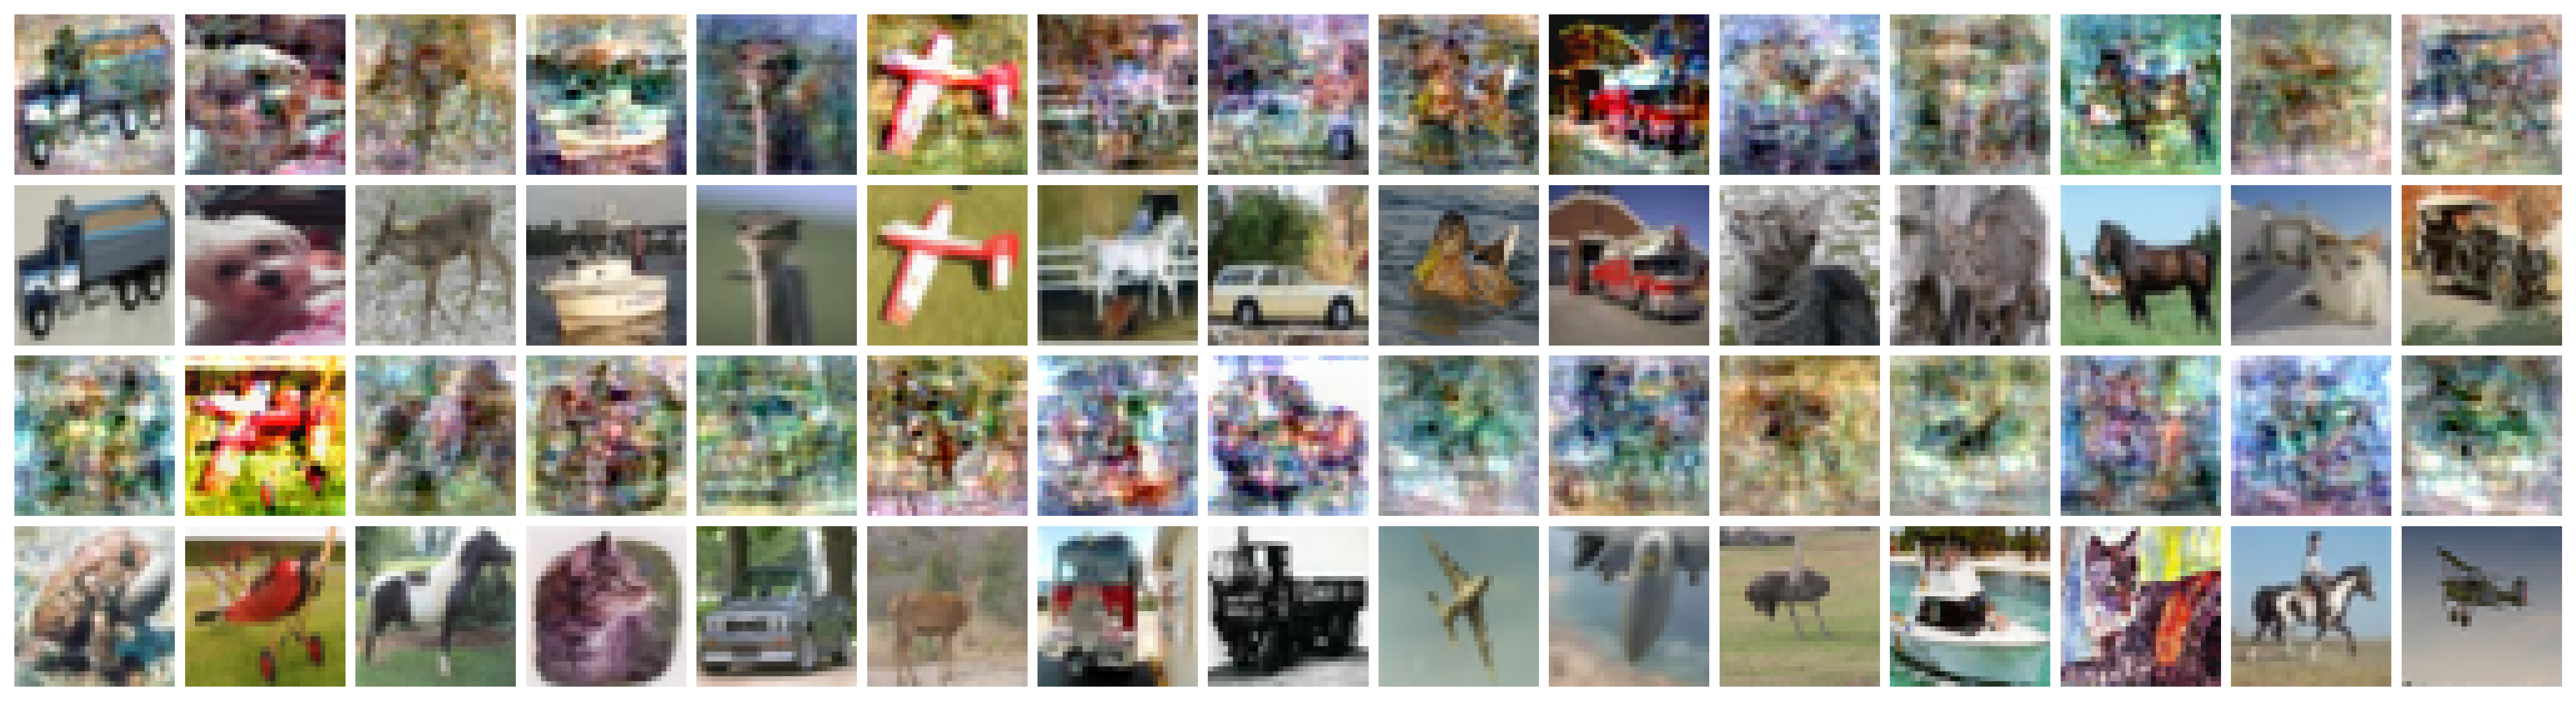

  0%|          | 0/17 [00:00<?, ?it/s]

DONE!


In [8]:
# Find "Good" Resonctructions (as detailed in Appendix B.3):

# Find Nearest Neighbour
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc2', vote='min', use_bb=False, nn_threshold=1000)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean)
# # Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
values = model(Xtrn).data

# Plot
# color_by_labels = Ytrn[sort_idxs]
color_by_labels = None
figpath=None
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=color_by_labels, figpath=figpath, show=True, dpi=100)

### Show Weights of first Layer

CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 3, 32, 32]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


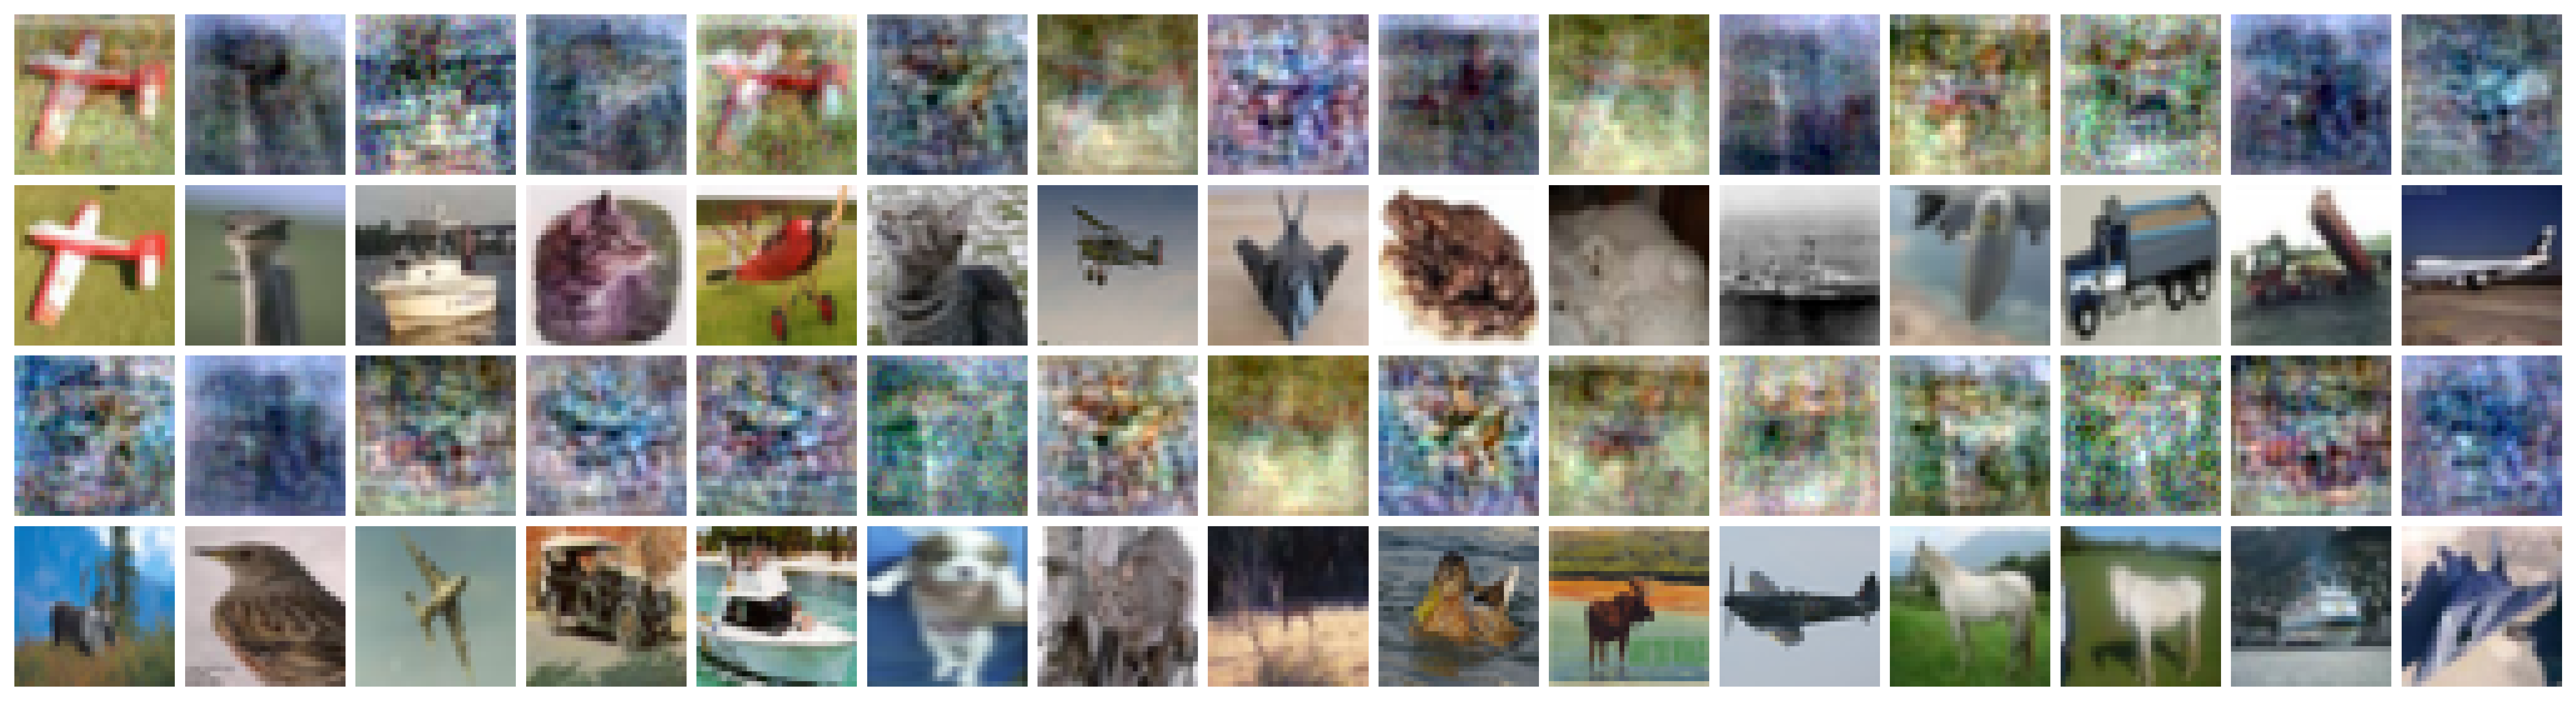

  0%|          | 0/17 [00:00<?, ?it/s]

DONE!


In [9]:
# Show how the weights of the first layer looks like, for comparison.
# Note that some data samples can be found in the first layer, but not as near as many that can be reconstructed using our approach.

X = sweep.W.reshape(sweep.W.shape[0], 3, 32, 32) 

# Find Nearest Neighbour
# xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='min', use_bb=False, nn_threshold=None)
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='mean', use_bb=True, nn_threshold=1.1)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean, xx_add_ds_mean=False)
# Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
# Plot
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=None, figpath=None, show=True, dpi=100)

In [10]:
W

Parameter containing:
tensor([[-1.5460e-03,  1.0324e-03,  1.2144e-03,  ...,  1.7470e-03,
          4.1331e-04,  5.3823e-05],
        [ 5.5341e-05,  6.1080e-04, -6.3723e-04,  ..., -1.8685e-04,
         -1.0012e-03, -1.9283e-03],
        [ 2.2880e-03,  2.9972e-03,  4.6181e-04,  ...,  3.4273e-03,
          2.4540e-03,  2.0917e-03],
        ...,
        [ 5.3540e-05,  5.5495e-04,  3.7939e-04,  ..., -3.9060e-04,
         -6.4141e-04, -1.1140e-03],
        [-2.5309e-03, -2.9771e-03, -1.7163e-03,  ..., -1.7364e-03,
         -1.6933e-03, -1.7120e-03],
        [-5.4976e-05,  1.4727e-04, -1.6837e-04,  ...,  5.8376e-04,
          3.1957e-04, -6.0574e-05]], requires_grad=True)